In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
def plot(ax, items, title, y_label, x_label):

    labels = list()
    n_epochs= None
    for label, item in items.items():
        if item:
            ax.plot(item)
            labels.append(label)
            n_epochs = len(item)

    ax.set_title(title)
    ax.set_xlabel(y_label)
    ax.set_ylabel(x_label)
    ax.legend(labels, loc='upper left')
    plt.xticks(np.arange(n_epochs), np.arange(1, n_epochs + 1))

In [3]:
"""
section = "layers"
path = "models/pytorch/{}/stats.csv"

filenames = [
    path.format("exp_01-b-baseline"),
    path.format("exp_02-b-2_layers"),
    path.format("exp_03-b-4_layers"),
    path.format("exp_04-b-5_layers"),
]

names = [
    "výchozí model",
    "2 skryté vrstvy",
    "4 skryté vsrtvy",
    "5 skrytých vrstev",
]
"""

'\nsection = "layers"\npath = "models/pytorch/{}/stats.csv"\n\nfilenames = [\n    path.format("exp_01-b-baseline"),\n    path.format("exp_02-b-2_layers"),\n    path.format("exp_03-b-4_layers"),\n    path.format("exp_04-b-5_layers"),\n]\n\nnames = [\n    "výchozí model",\n    "2 skryté vrstvy",\n    "4 skryté vsrtvy",\n    "5 skrytých vrstev",\n]\n'

In [4]:
"""
section = "margin"
path = "models/pytorch/{}/stats.csv"

filenames = [
    path.format("exp_01-b-baseline"),
    path.format("exp_05-b-margin_5"),
    path.format("exp_06-b-margin_15"),
    path.format("exp_07-b-margin_30"),
    path.format("exp_08-b-margin_50"),
]

names = [
    "výchozí model",
    "velikost okolí 5",
    "velikost okolí 15",
    "velikost okolí 30",
    "velikost okolí 50",
]
"""

'\nsection = "margin"\npath = "models/pytorch/{}/stats.csv"\n\nfilenames = [\n    path.format("exp_01-b-baseline"),\n    path.format("exp_05-b-margin_5"),\n    path.format("exp_06-b-margin_15"),\n    path.format("exp_07-b-margin_30"),\n    path.format("exp_08-b-margin_50"),\n]\n\nnames = [\n    "výchozí model",\n    "velikost okolí 5",\n    "velikost okolí 15",\n    "velikost okolí 30",\n    "velikost okolí 50",\n]\n'

In [5]:

section = "width"
path = "models/pytorch/{}/stats.csv"

filenames = [
    path.format("exp_01-b-baseline"),
    path.format("exp_09-b-width_16"),
    path.format("exp_10-b-width_64"),
    path.format("exp_11-b-width_256"),
    path.format("exp_12-b-width_512"),
]

names = [
    "výchozí model",
    "šířka vrstev 16",
    "šířka vrstev 64",
    "šířka vrstev 256",
    "šířka vrstev 512",
]


In [6]:
"""
section = "snizeni"
path = "models/pytorch/{}/stats.csv"

filenames = [
    path.format("exp_01-baseline"),
    path.format("exp_13-4_emotions"),
    path.format("exp_14-3_emotions"),
]

names = [
    "výchozí model",
    "3 emoce",
    "4 emoce",
]
"""

'\nsection = "snizeni"\npath = "models/pytorch/{}/stats.csv"\n\nfilenames = [\n    path.format("exp_01-baseline"),\n    path.format("exp_13-4_emotions"),\n    path.format("exp_14-3_emotions"),\n]\n\nnames = [\n    "výchozí model",\n    "3 emoce",\n    "4 emoce",\n]\n'

In [7]:
"""
path = "models/pytorch/{}/stats.csv"

section = "final"

filenames = [
    path.format("exp_17-batch_128"),
    path.format("exp_18-batch_128-20_epochs"),
    path.format("exp_19-batch_128-30_epochs"),
]

names = [
    "závěrečný model"
]
"""

'\npath = "models/pytorch/{}/stats.csv"\n\nsection = "final"\n\nfilenames = [\n    path.format("exp_17-batch_128"),\n    path.format("exp_18-batch_128-20_epochs"),\n    path.format("exp_19-batch_128-30_epochs"),\n]\n\nnames = [\n    "závěrečný model"\n]\n'

In [8]:
path = "models/pytorch/{}/stats.csv"

section = "regularization"

filenames = [
    path.format("exp_01-b-baseline"),
    path.format("exp_13-b-drop_out"),
    path.format("exp_14-b-batch_norm"),
    path.format("exp_15-b-drop_out_and_batch_norm"),
]

names = [
    "výchozí model",
    "drop out",
    "normalizace dávek",
    "drop out s normalizací dávek",
]

In [9]:
"""
path = "models/pytorch/{}/stats.csv"

section = "batch_size"

filenames = [
    path.format("exp_16-batch_norm"),
    path.format("exp_21-batch_64"),
    path.format("exp_17-batch_128"),
    path.format("exp_20-batch_256"),
]

names = [
    "drop out s normalizací dávek",
    "velikost dávky 64",
    "velikost dávky 128",
    "velikost dávky 256",
]
"""

'\npath = "models/pytorch/{}/stats.csv"\n\nsection = "batch_size"\n\nfilenames = [\n    path.format("exp_16-batch_norm"),\n    path.format("exp_21-batch_64"),\n    path.format("exp_17-batch_128"),\n    path.format("exp_20-batch_256"),\n]\n\nnames = [\n    "drop out s normalizací dávek",\n    "velikost dávky 64",\n    "velikost dávky 128",\n    "velikost dávky 256",\n]\n'

In [10]:
experiments = []

for filename in filenames:
    exp = pd.read_csv(filename)
    experiments.append(exp)

In [11]:
"""
experiments = pd.concat(experiments)
experiments.reset_index(inplace=True, drop=True)
experiments = [experiments]
"""

'\nexperiments = pd.concat(experiments)\nexperiments.reset_index(inplace=True, drop=True)\nexperiments = [experiments]\n'

In [12]:
train_losses = {}
val_losses = {}

train_frame_acc = {}
val_frame_acc = {}

In [13]:
len(experiments)

4

In [14]:
for name, exp in zip(names, experiments):
    train_frame_acc[name] = list(exp['frame acc trénovací sada'])
    val_frame_acc[name] = list(exp['frame acc validační sada'])
    
    train_losses[name] = list(exp['losses trénovací sada'])
    val_losses[name] = list(exp['losses validační sada'])

In [15]:
# name = '2 vrstvy'
# print("val loss ", val_losses[name][-1])
# print("train loss ", train_losses[name][-1])
# print("val frame acc ", val_frame_acc[name][-1])
# print("train frame acc", train_frame_acc[name][-1])

In [16]:
val_losses.keys()

dict_keys(['výchozí model', 'drop out', 'normalizace dávek', 'drop out s normalizací dávek'])

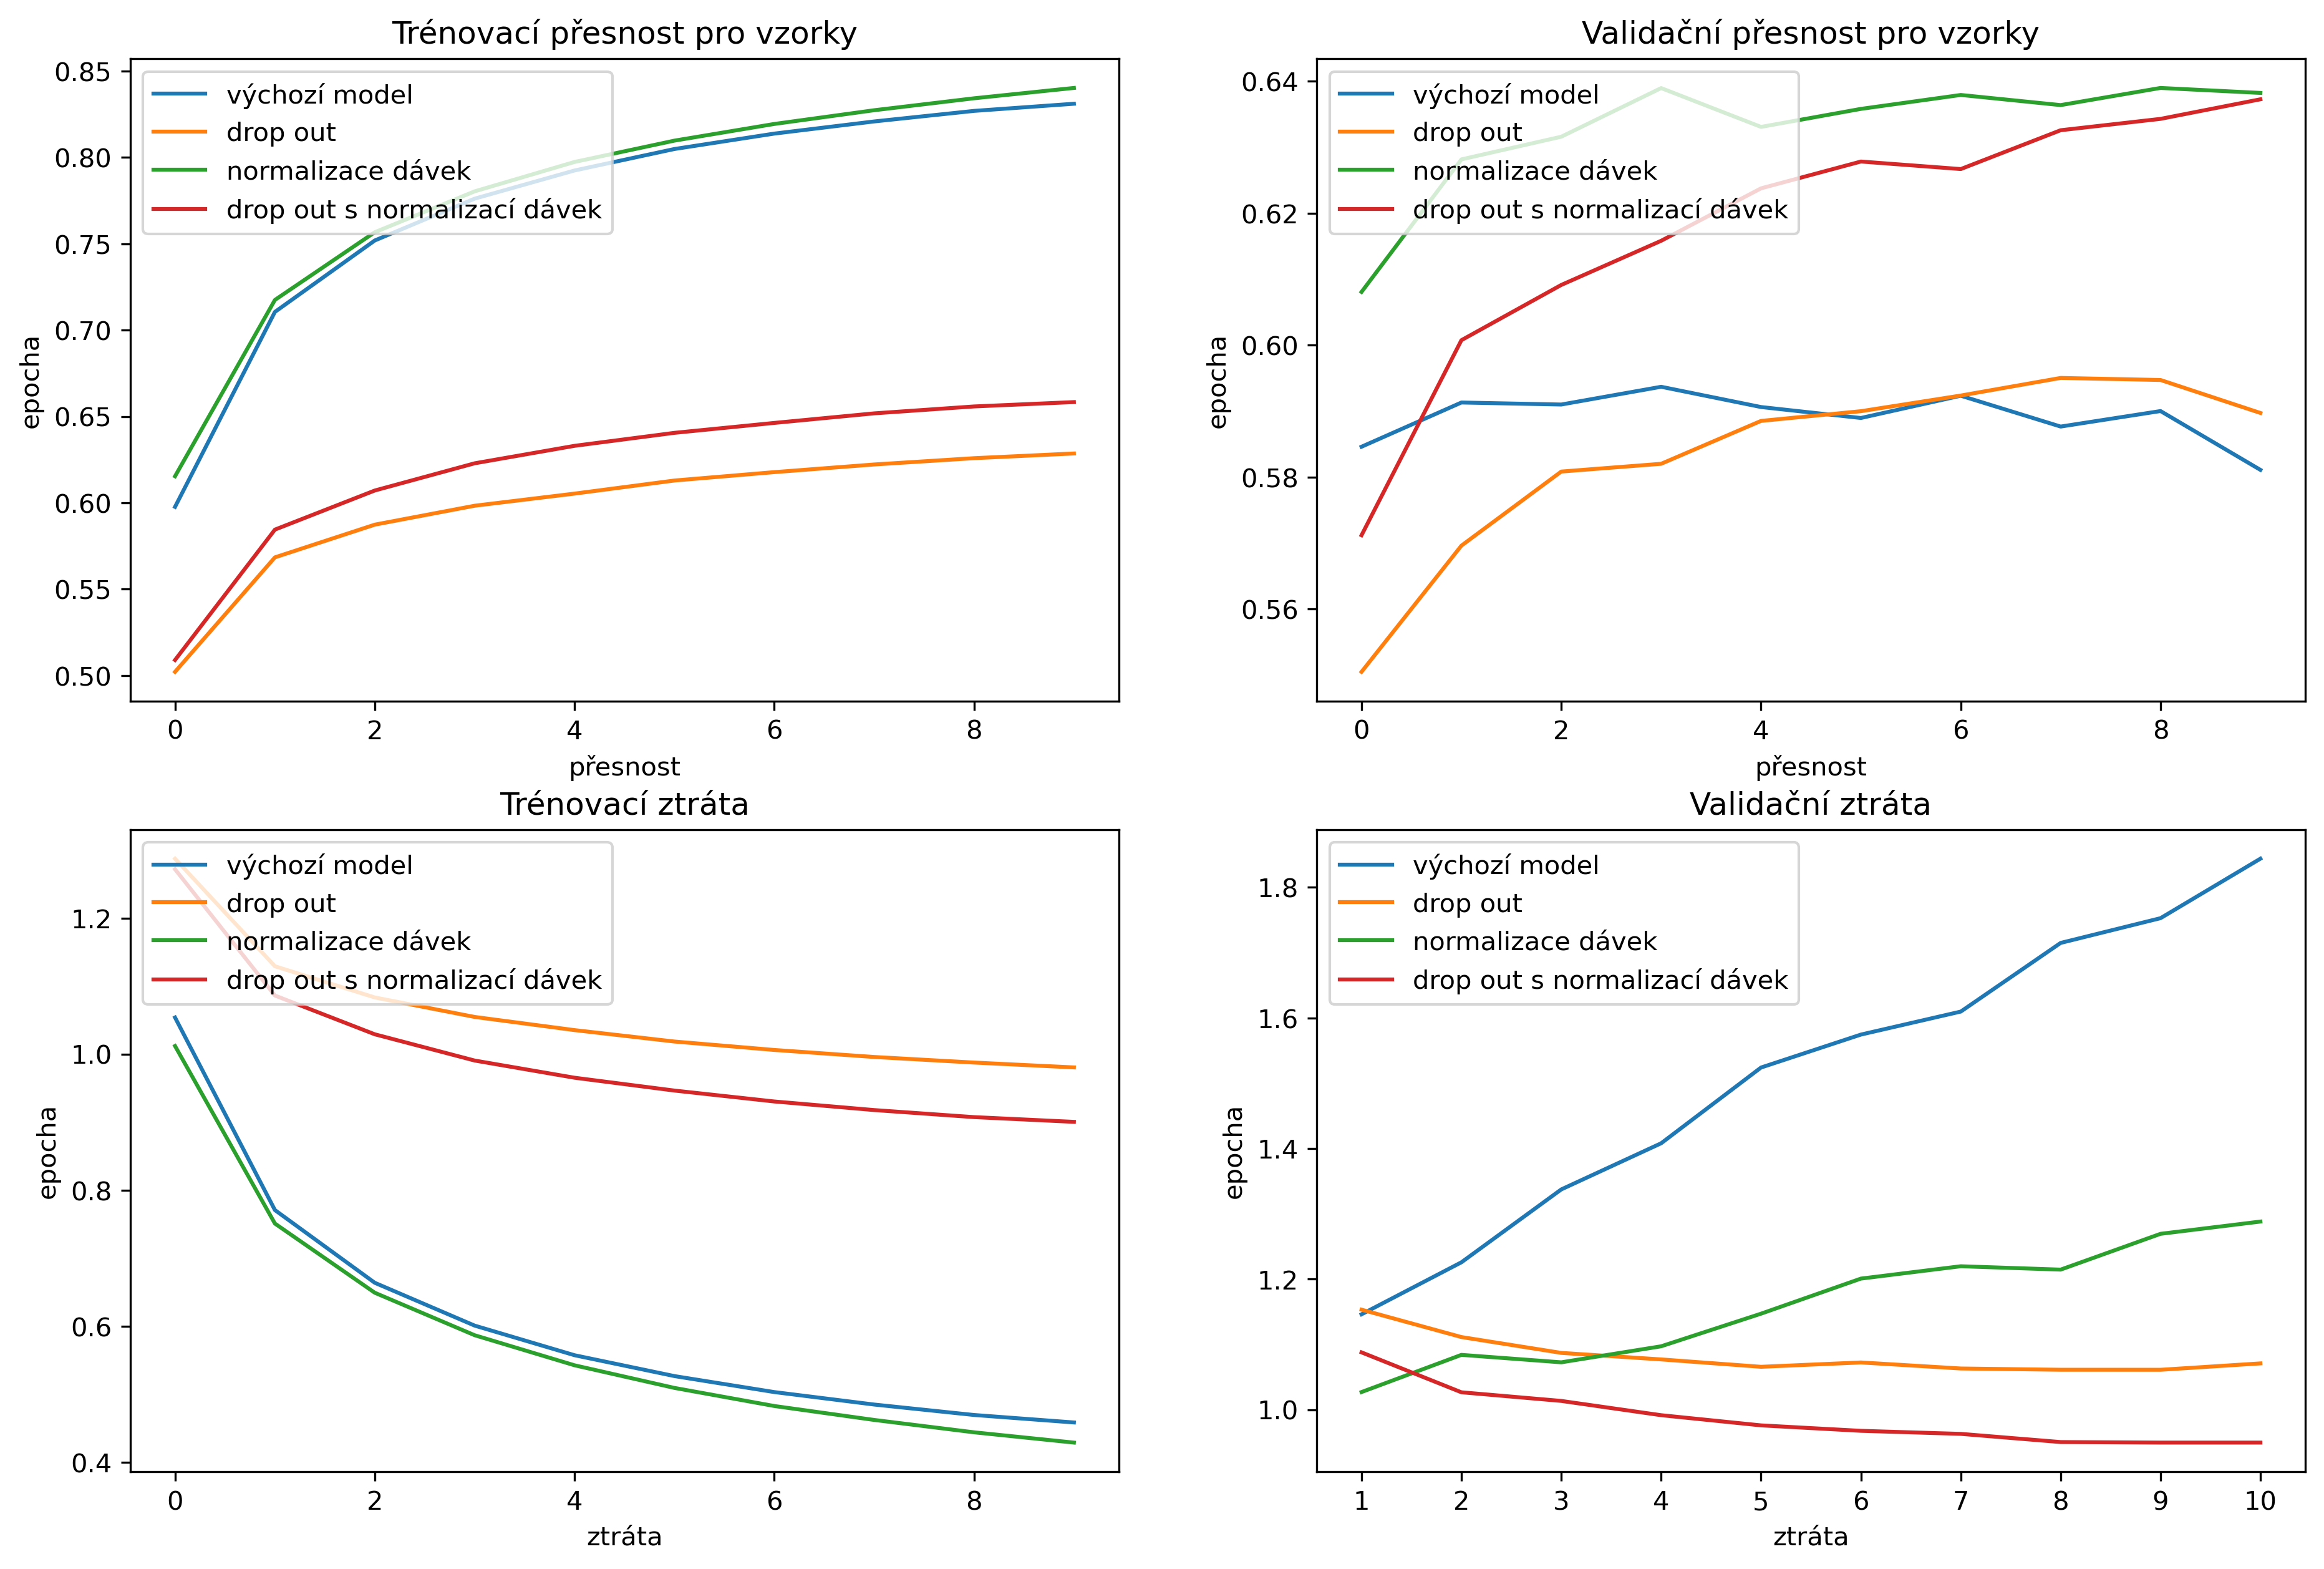

In [17]:
empty = "#"
titles = [
    "Trénovací přesnost pro vzorky",
    "Validační přesnost pro vzorky",
    "Trénovací ztráta",
    "Validační ztráta",
]

y_labels = [
    "přesnost",
    "přesnost",
    "ztráta",
    "ztráta",
]

items = [
    train_frame_acc,
    val_frame_acc,
    train_losses,
    val_losses,
]

n_rows = 2
n_cols = 2
dpi = 300
final_fig , axes = plt.subplots(n_rows, n_cols, dpi=dpi)
final_fig.set_figheight(10)
final_fig.set_figwidth(15)

for row in range(n_rows):
    for col in range(n_cols):
        ax = axes[row][col]
        
        index = row * n_cols + col
        title = titles[index]
        
        if title == empty:
            final_fig.delaxes(axes[row][col])
            continue
        
        item = items[index]
        
        y_label = y_labels[index]
        
        plot(ax, item, title, y_label, "epocha")

In [18]:
dirname = "/Users/tomaspetricek/TUL/TUL_2020:21/BP/Speech_Emotion_Recognition/Attachments/"
title = "training_course-{}".format(section)
filename = title + ".png"
path = os.path.join(dirname, filename)
final_fig.savefig(path, dpi=dpi)

### Concatenate